### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [7]:
import pandas as pd

In [4]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación



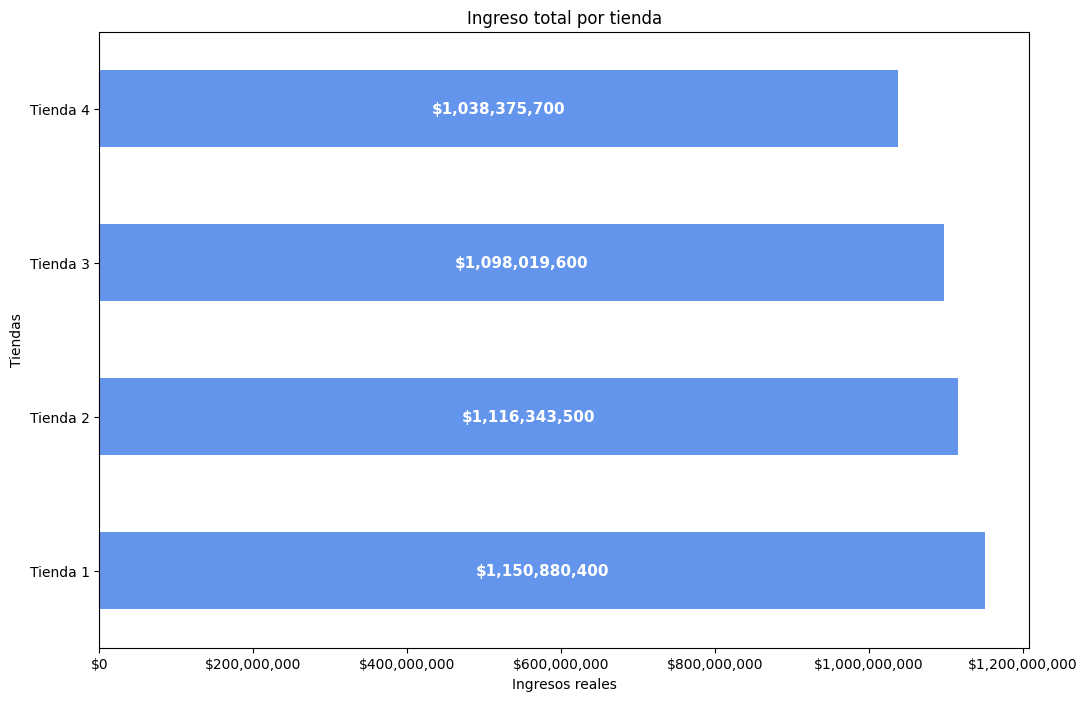

El ingreso total de cada tienda es:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


In [3]:
#OTRA FORMA DE VISUALIZAR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

ingresos = pd.Series(
    [total_tienda1, total_tienda2, total_tienda3, total_tienda4],
    index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
)

ax = ingresos.plot(kind="barh", figsize=(12,8), color="cornflowerblue")

plt.title("Ingreso total por tienda")
plt.xlabel("Ingresos reales")
plt.ylabel("Tiendas")

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

for i, v in enumerate(ingresos.values):
    ax.text(
        v * 0.5,
        i,
        f"${v:,.0f}",
        va='center',
        ha='center',
        color='white',
        fontweight='bold',
        fontsize=11
    )

plt.show()

print("El ingreso total de cada tienda es:")
print(f"Tienda 1: ${total_tienda1:,.0f}")
print(f"Tienda 2: ${total_tienda2:,.0f}")
print(f"Tienda 3: ${total_tienda3:,.0f}")
print(f"Tienda 4: ${total_tienda4:,.0f}")


# 2. Ventas por categoría

In [30]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [9]:
tienda.rename(columns={'Categoría del Producto': 'categorias'}, inplace=True)
tienda2.rename(columns={'Categoría del Producto': 'categorias'}, inplace=True)
tienda3.rename(columns={'Categoría del Producto': 'categorias'}, inplace=True)
tienda4.rename(columns={'Categoría del Producto': 'categorias'}, inplace=True)


In [10]:
tienda.categorias.value_counts()

,count
categorias,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [11]:
tienda2.categorias.value_counts()

,count
categorias,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [12]:
tienda3.categorias.value_counts()

,count
categorias,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


In [42]:
tienda4.categorias.value_counts()

,count
categorias,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [4]:
def ventas_por_categoria(df, nombre_tienda):
    ventas_categoria = (
        df.groupby("Categoría del Producto")
          .size()
          .reset_index(name="Cantidad de ventas")
          .sort_values(by="Cantidad de ventas", ascending=False)
    )

    print(f"\n Ventas por categoría - {nombre_tienda}")
    print(ventas_categoria)

    return ventas_categoria


vc_tienda1 = ventas_por_categoria(tienda, "Tienda 1")
vc_tienda2 = ventas_por_categoria(tienda2, "Tienda 2")
vc_tienda3 = ventas_por_categoria(tienda3, "Tienda 3")
vc_tienda4 = ventas_por_categoria(tienda4, "Tienda 4")



 Ventas por categoría - Tienda 1
    Categoría del Producto  Cantidad de ventas
7                  Muebles                 465
3             Electrónicos                 448
5                 Juguetes                 324
2        Electrodomésticos                 312
1     Deportes y diversión                 284
4   Instrumentos musicales                 182
6                   Libros                 173
0  Artículos para el hogar                 171

 Ventas por categoría - Tienda 2
    Categoría del Producto  Cantidad de ventas
7                  Muebles                 442
3             Electrónicos                 422
5                 Juguetes                 313
2        Electrodomésticos                 305
1     Deportes y diversión                 275
4   Instrumentos musicales                 224
6                   Libros                 197
0  Artículos para el hogar                 181

 Ventas por categoría - Tienda 3
    Categoría del Producto  Cantidad de ventas
7    

In [12]:
top_n = 5

def top_categorias(df, nombre_tienda):
    top = (
        df.groupby("Categoría del Producto")
          .size()
          .reset_index(name="Cantidad de ventas")
          .sort_values(by="Cantidad de ventas", ascending=False)
          .head(top_n)
    )

    print(f"\n Top {top_n} categorías más vendidas - {nombre_tienda}")
    print(top)

    return top


top_tienda1 = top_categorias(tienda, "Tienda 1")
top_tienda2 = top_categorias(tienda2, "Tienda 2")
top_tienda3 = top_categorias(tienda3, "Tienda 3")
top_tienda4 = top_categorias(tienda4, "Tienda 4")



 Top 5 categorías más vendidas - Tienda 1
  Categoría del Producto  Cantidad de ventas
7                Muebles                 465
3           Electrónicos                 448
5               Juguetes                 324
2      Electrodomésticos                 312
1   Deportes y diversión                 284

 Top 5 categorías más vendidas - Tienda 2
  Categoría del Producto  Cantidad de ventas
7                Muebles                 442
3           Electrónicos                 422
5               Juguetes                 313
2      Electrodomésticos                 305
1   Deportes y diversión                 275

 Top 5 categorías más vendidas - Tienda 3
  Categoría del Producto  Cantidad de ventas
7                Muebles                 499
3           Electrónicos                 451
5               Juguetes                 315
2      Electrodomésticos                 278
1   Deportes y diversión                 277

 Top 5 categorías más vendidas - Tienda 4
  Categoría del Pr

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(top_tienda1["Categoría del Producto"],
        top_tienda1["Cantidad de ventas"])

plt.title("Top 5 categorías más vendidas - Tienda 1")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'top_tienda1' is not defined

<Figure size 640x480 with 0 Axes>

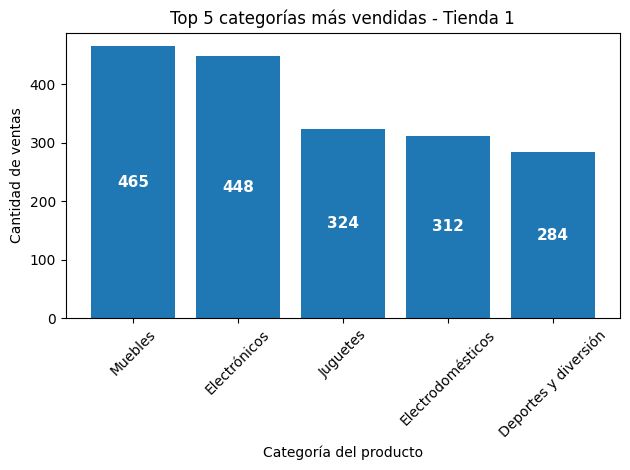

In [15]:
import matplotlib.pyplot as plt

plt.figure()

plt.bar(
    top_tienda1["Categoría del Producto"],
    top_tienda1["Cantidad de ventas"]
)

plt.title("Top 5 categorías más vendidas - Tienda 1")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)

for i, v in enumerate(top_tienda1["Cantidad de ventas"]):
    plt.text(
        i,                 # posición X
        v * 0.5,           # posición Y (50% de la barra)
        str(v),            # texto
        ha='center',
        va='center',
        color='white',
        fontweight='bold',
        fontsize=11
    )

plt.tight_layout()
plt.show()


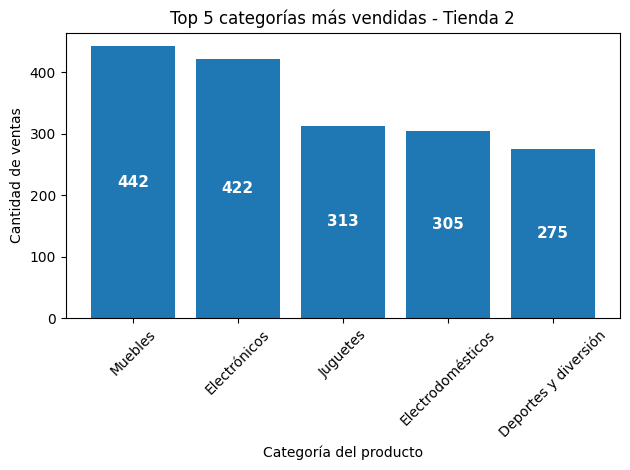

In [16]:
import matplotlib.pyplot as plt

plt.figure()

plt.bar(
    top_tienda2["Categoría del Producto"],
    top_tienda2["Cantidad de ventas"]
)

plt.title("Top 5 categorías más vendidas - Tienda 2")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)

for i, v in enumerate(top_tienda2["Cantidad de ventas"]):
    plt.text(
        i,                 # posición X
        v * 0.5,           # posición Y (50% de la barra)
        str(v),            # texto
        ha='center',
        va='center',
        color='white',
        fontweight='bold',
        fontsize=11
    )

plt.tight_layout()
plt.show()

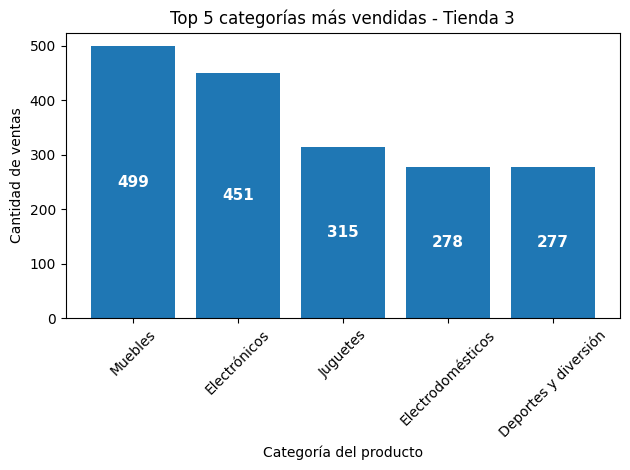

In [17]:
import matplotlib.pyplot as plt

plt.figure()

plt.bar(
    top_tienda3["Categoría del Producto"],
    top_tienda3["Cantidad de ventas"]
)

plt.title("Top 5 categorías más vendidas - Tienda 3")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)

for i, v in enumerate(top_tienda3["Cantidad de ventas"]):
    plt.text(
        i,                 # posición X
        v * 0.5,           # posición Y (50% de la barra)
        str(v),            # texto
        ha='center',
        va='center',
        color='white',
        fontweight='bold',
        fontsize=11
    )

plt.tight_layout()
plt.show()

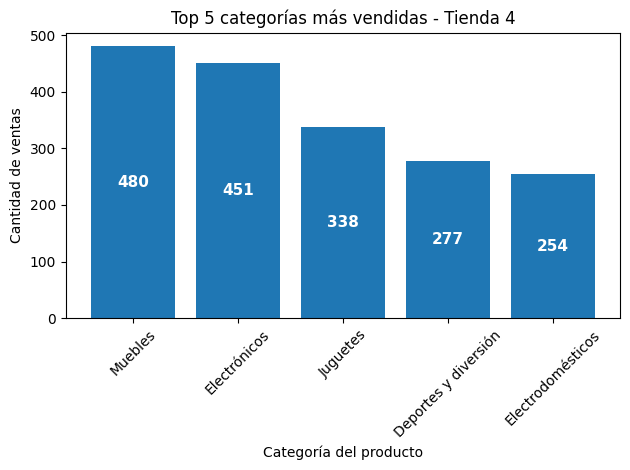

In [19]:
import matplotlib.pyplot as plt

plt.figure()

plt.bar(
    top_tienda4["Categoría del Producto"],
    top_tienda4["Cantidad de ventas"]
)

plt.title("Top 5 categorías más vendidas - Tienda 4")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)

for i, v in enumerate(top_tienda4["Cantidad de ventas"]):
    plt.text(
        i,                 # posición X
        v * 0.5,           # posición Y (50% de la barra)
        str(v),            # texto
        ha='center',
        va='center',
        color='white',
        fontweight='bold',
        fontsize=11
    )

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


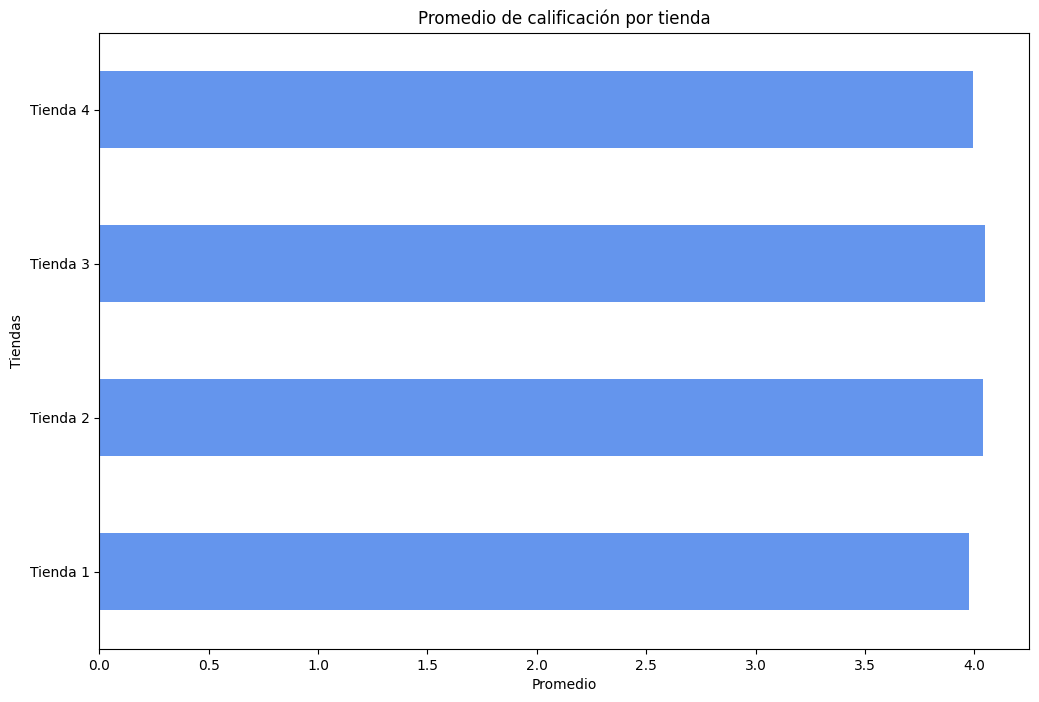

In [45]:
mean_tienda1 = tienda.Calificación.mean()
mean_tienda2 = tienda2.Calificación.mean()
mean_tienda3 = tienda3.Calificación.mean()
mean_tienda4 = tienda4.Calificación.mean()

calificacion_tiendas = pd.Series(
    [mean_tienda1, mean_tienda2, mean_tienda3, mean_tienda4],
    index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
)

calificacion_tiendas.plot(kind="barh", figsize=(12,8), color="cornflowerblue")
plt.title("Promedio de calificación por tienda")
plt.xlabel("Promedio")
plt.ylabel("Tiendas")
plt.show()



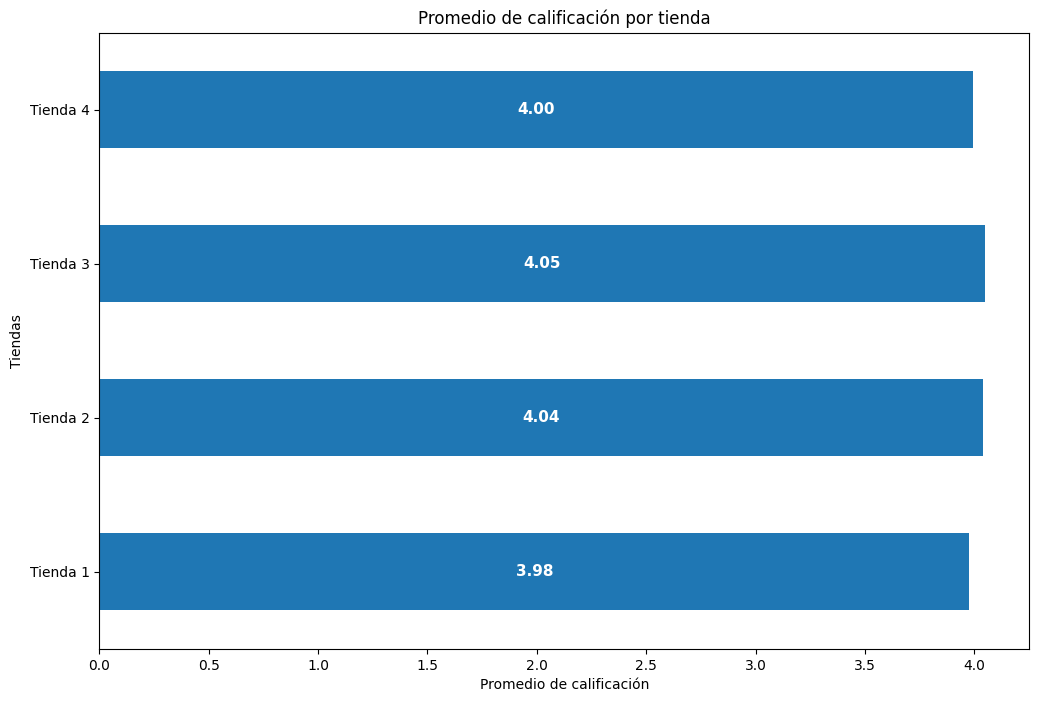

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

mean_tienda1 = tienda["Calificación"].mean()
mean_tienda2 = tienda2["Calificación"].mean()
mean_tienda3 = tienda3["Calificación"].mean()
mean_tienda4 = tienda4["Calificación"].mean()

calificacion_tiendas = pd.Series(
    [mean_tienda1, mean_tienda2, mean_tienda3, mean_tienda4],
    index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
)

ax = calificacion_tiendas.plot(kind="barh", figsize=(12,8))

plt.title("Promedio de calificación por tienda")
plt.xlabel("Promedio de calificación")
plt.ylabel("Tiendas")
for i, v in enumerate(calificacion_tiendas.values):
    ax.text(
        v * 0.5,             # 50% del largo de la barra
        i,
        f"{v:.2f}",          # 2 decimales
        va='center',
        ha='center',
        color='white',
        fontweight='bold',
        fontsize=11
    )

plt.show()


# 4. Productos más y menos vendidos

In [46]:
tienda.Producto.unique()

array(['Asistente virtual', 'Mesa de comedor', 'Juego de mesa',
       'Microondas', 'Silla de oficina', 'Bloques de construcción',
       'Muñeca bebé', 'Lavavajillas', 'Lavadora de ropa',
       'Carrito de control remoto', 'Refrigerador', 'Auriculares',
       'Olla de presión', 'Bicicleta', 'Ciencia de datos con Python',
       'Balón de voleibol', 'Ajedrez de madera', 'TV LED UHD 4K',
       'Vaso térmico', 'Kit de bancas', 'Dashboards con Power BI',
       'Cubertería', 'Set de ollas', 'Batería', 'Cuerda para saltar',
       'Estufa', 'Cama box', 'Impresora', 'Mesa de noche', 'Armario',
       'Dinosaurio Rex', 'Guitarra eléctrica', 'Secadora de ropa',
       'Sofá reclinable', 'Tablet ABXY', 'Cubo mágico 8x8',
       'Set de vasos', 'Modelado predictivo', 'Iphone 15', 'Mochila',
       'Balón de baloncesto', 'Auriculares con micrófono', 'Sillón',
       'Guitarra acústica', 'Iniciando en programación', 'Celular ABXY',
       'Smartwatch', 'Mesa de centro', 'Cama king', 'Smart TV

In [49]:
tienda.Producto.value_counts()

,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Vaso térmico,54


In [50]:
tienda2.Producto.value_counts()

,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58
Secadora de ropa,57
Iphone 15,55
Bloques de construcción,54
Armario,54


In [51]:
tienda3.Producto.value_counts()

,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55
Smart TV,54
Estufa,53
Cuerda para saltar,53
Modelado predictivo,53


In [52]:
tienda4.Producto.value_counts()

,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55
Mesa de comedor,55
Mesa de noche,55
Smart TV,54
Bloques de construcción,54


In [16]:
def ventas_todos_productos(df, nombre_tienda):
    conteo_productos = (
        df.groupby("Producto")
          .size()
          .reset_index(name="Cantidad de ventas")
          .sort_values(by="Cantidad de ventas", ascending=True)
    )

    print(f"\n Ventas de TODOS los productos - {nombre_tienda}")
    print(conteo_productos.head())

    return conteo_productos


prod_tienda1 = ventas_todos_productos(tienda, "Tienda 1")
prod_tienda2 = ventas_todos_productos(tienda2, "Tienda 2")
prod_tienda3 = ventas_todos_productos(tienda3, "Tienda 3")
prod_tienda4 = ventas_todos_productos(tienda4, "Tienda 4")



 Ventas de TODOS los productos - Tienda 1
                       Producto  Cantidad de ventas
4     Auriculares con micrófono                  33
13                 Celular ABXY                  33
37              Olla de presión                  35
38                    Pandereta                  36
14  Ciencia de datos con Python                  39

 Ventas de TODOS los productos - Tienda 2
           Producto  Cantidad de ventas
26    Juego de mesa                  32
23        Impresora                  34
31  Mesa de comedor                  34
44           Sillón                  35
3       Auriculares                  37

 Ventas de TODOS los productos - Tienda 3
                   Producto  Cantidad de ventas
9   Bloques de construcción                  35
42             Set de vasos                  36
34                  Mochila                  36
33               Microondas                  36
50             Vaso térmico                  38

 Ventas de TODOS los productos

In [18]:
import matplotlib.pyplot as plt

def grafico_todos_productos(df, titulo):
    plt.figure(figsize=(12, max(8, len(df) * 0.35)))

    plt.barh(df["Producto"], df["Cantidad de ventas"])

    plt.title(titulo)
    plt.xlabel("Cantidad de ventas")
    plt.ylabel("Producto")
    for i, v in enumerate(df["Cantidad de ventas"]):
        plt.text(
            v * 0.5,
            i,
            str(v),
            va='center',
            ha='center',
            color='white',
            fontweight='bold',
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


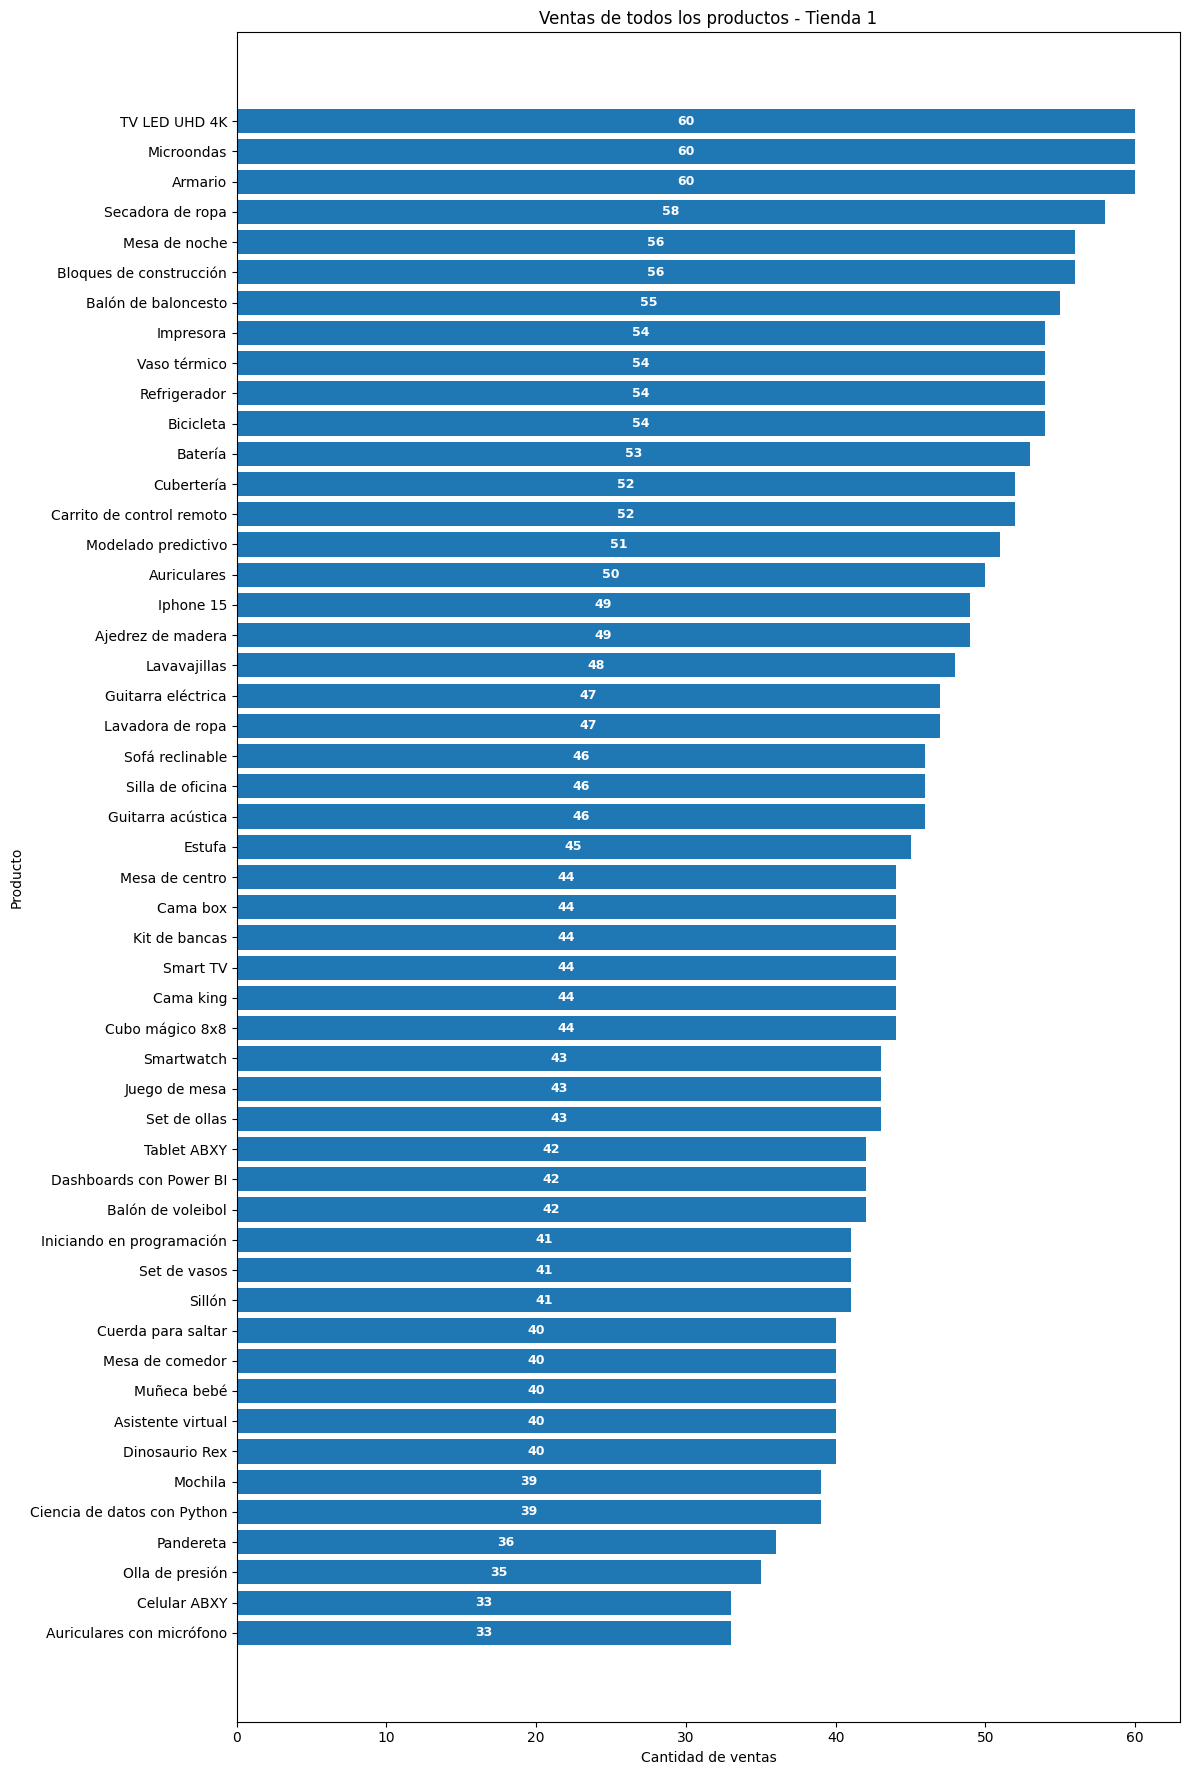

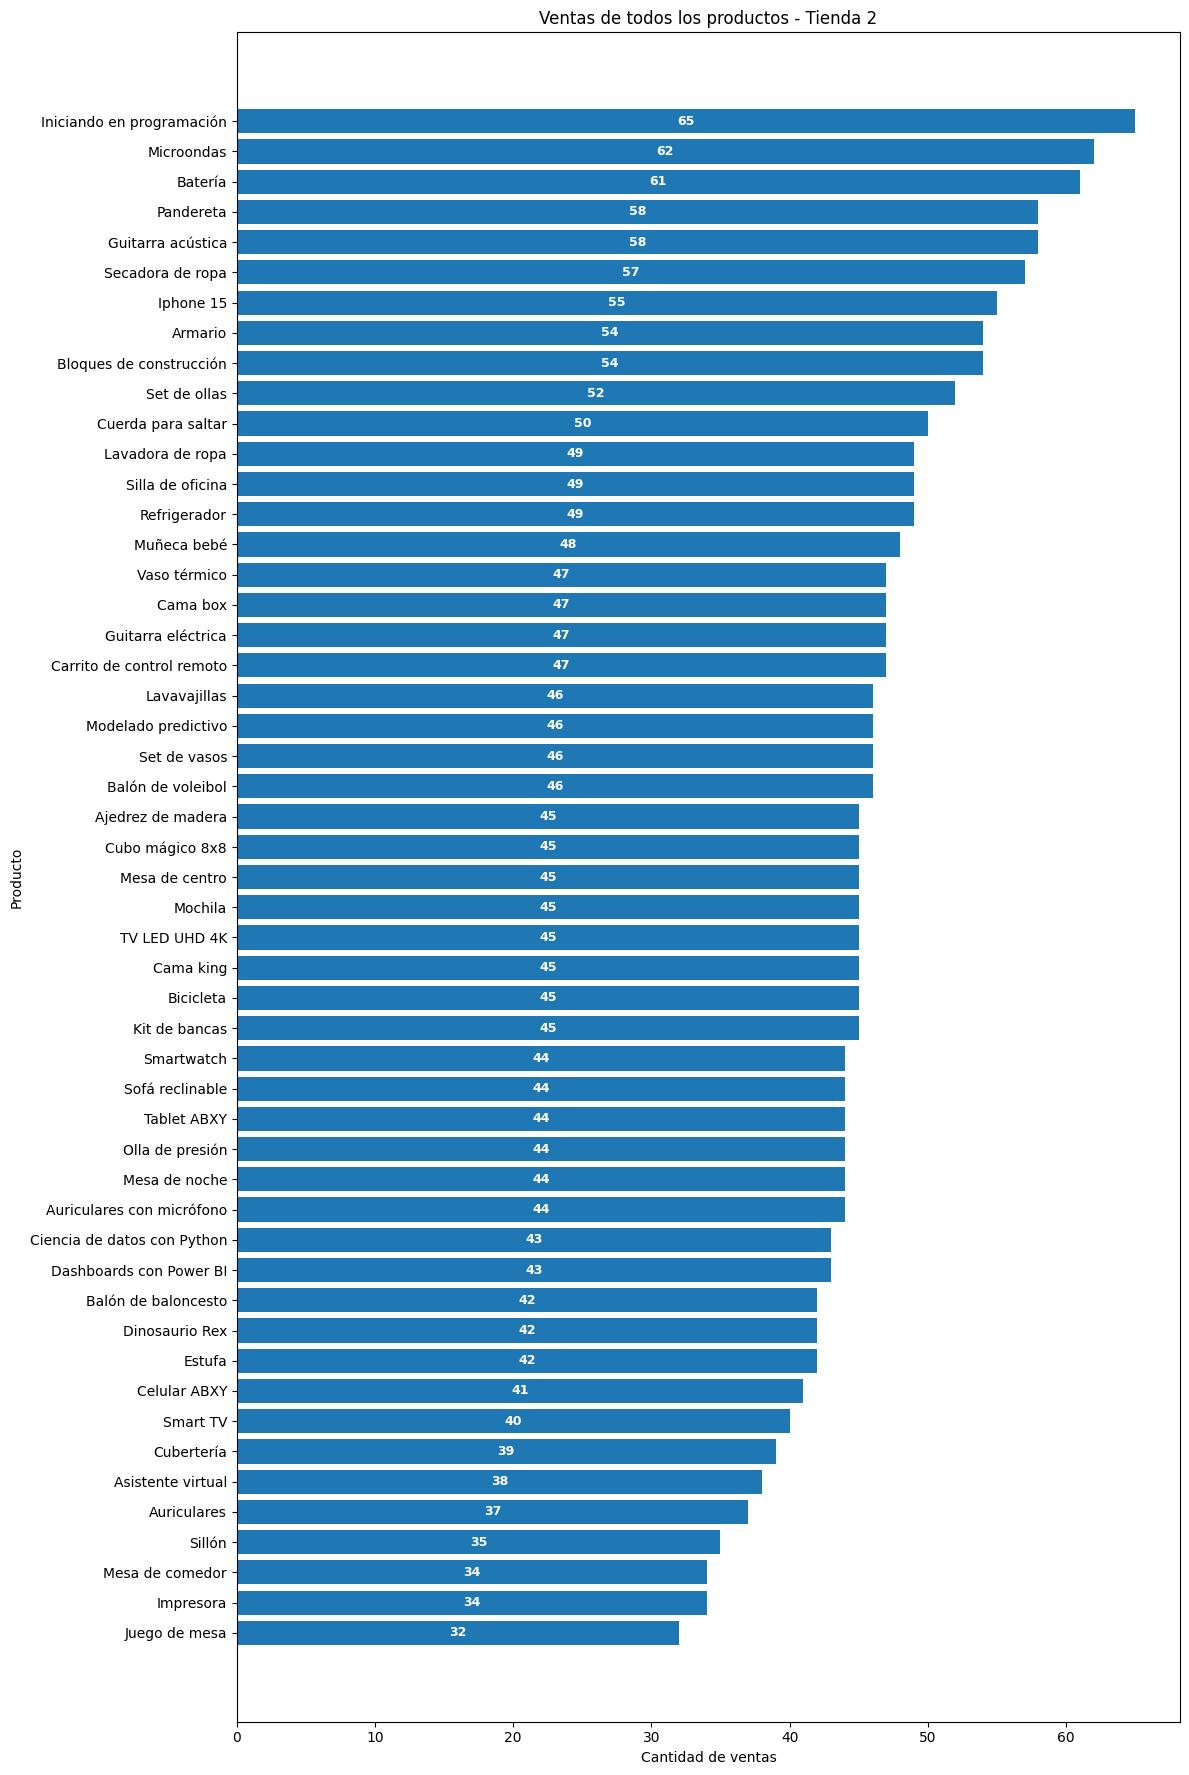

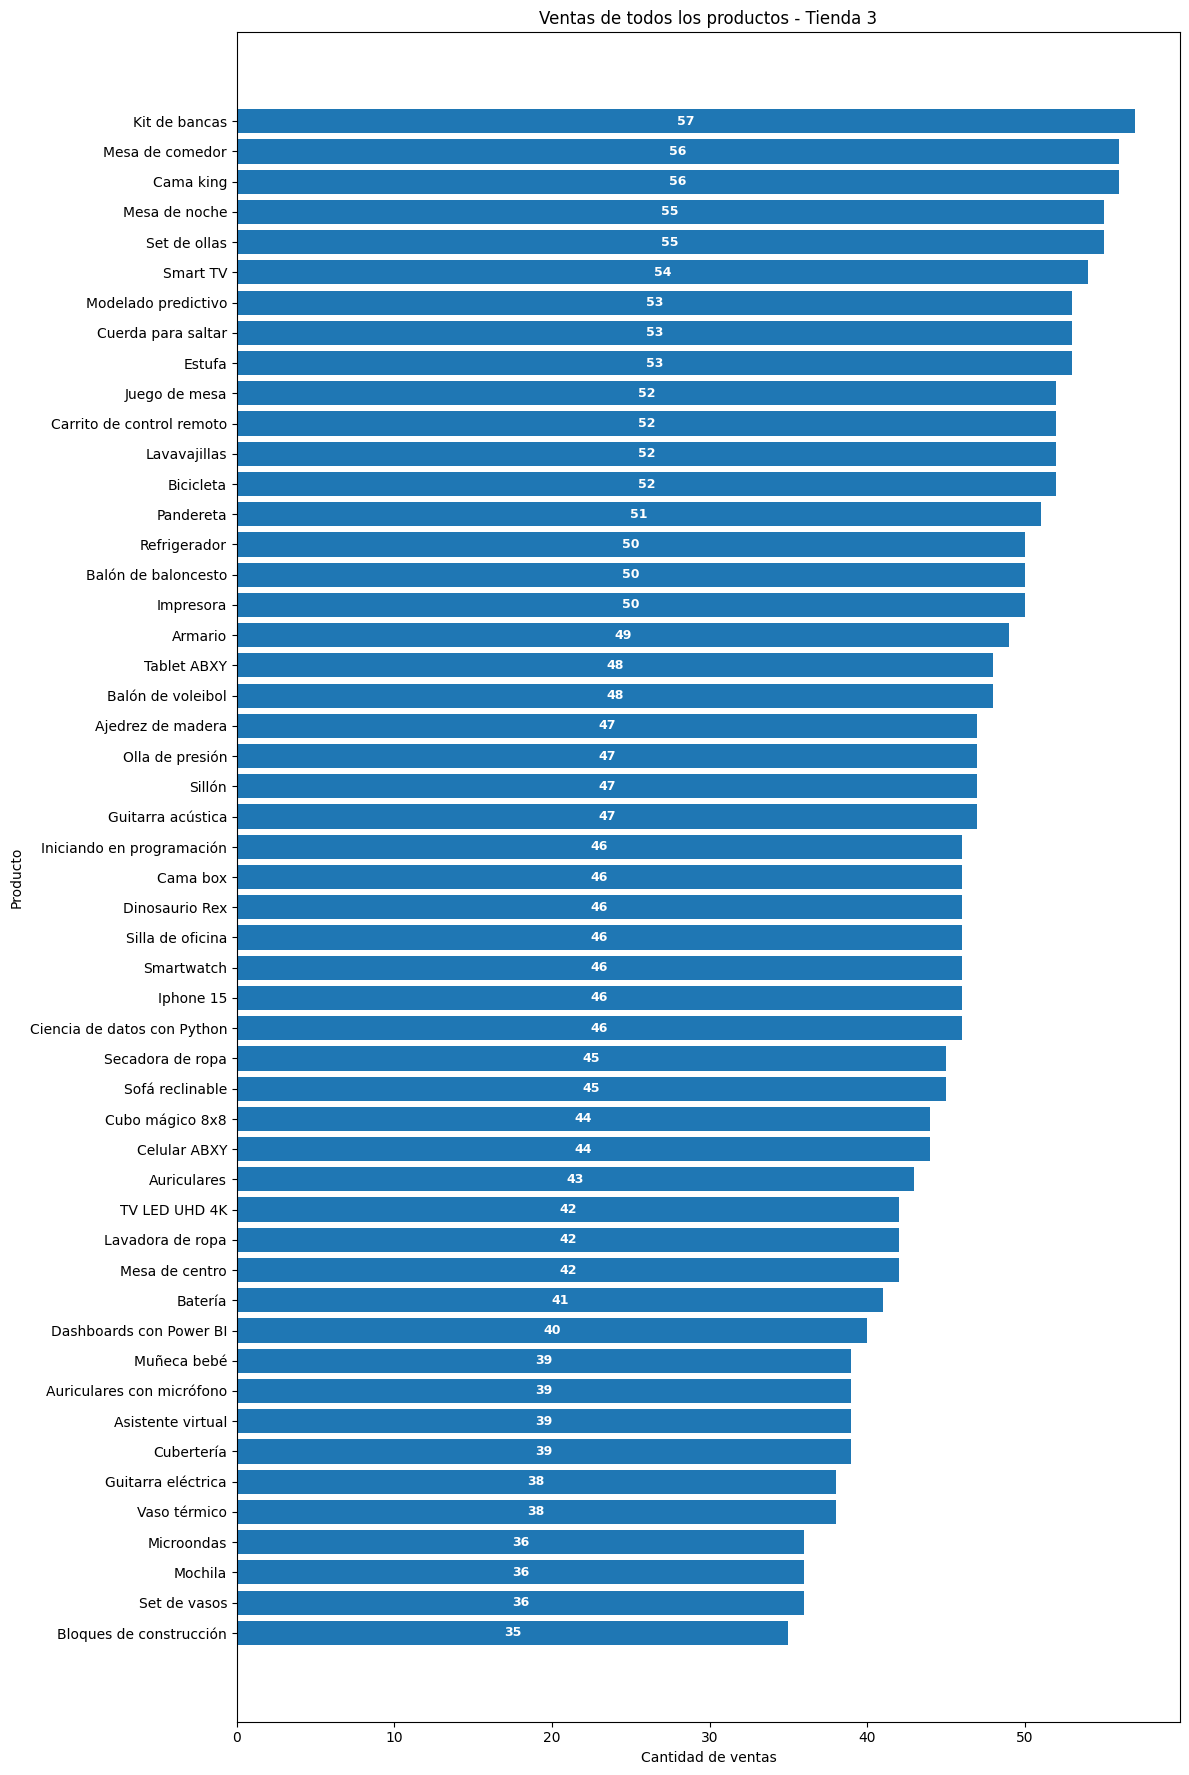

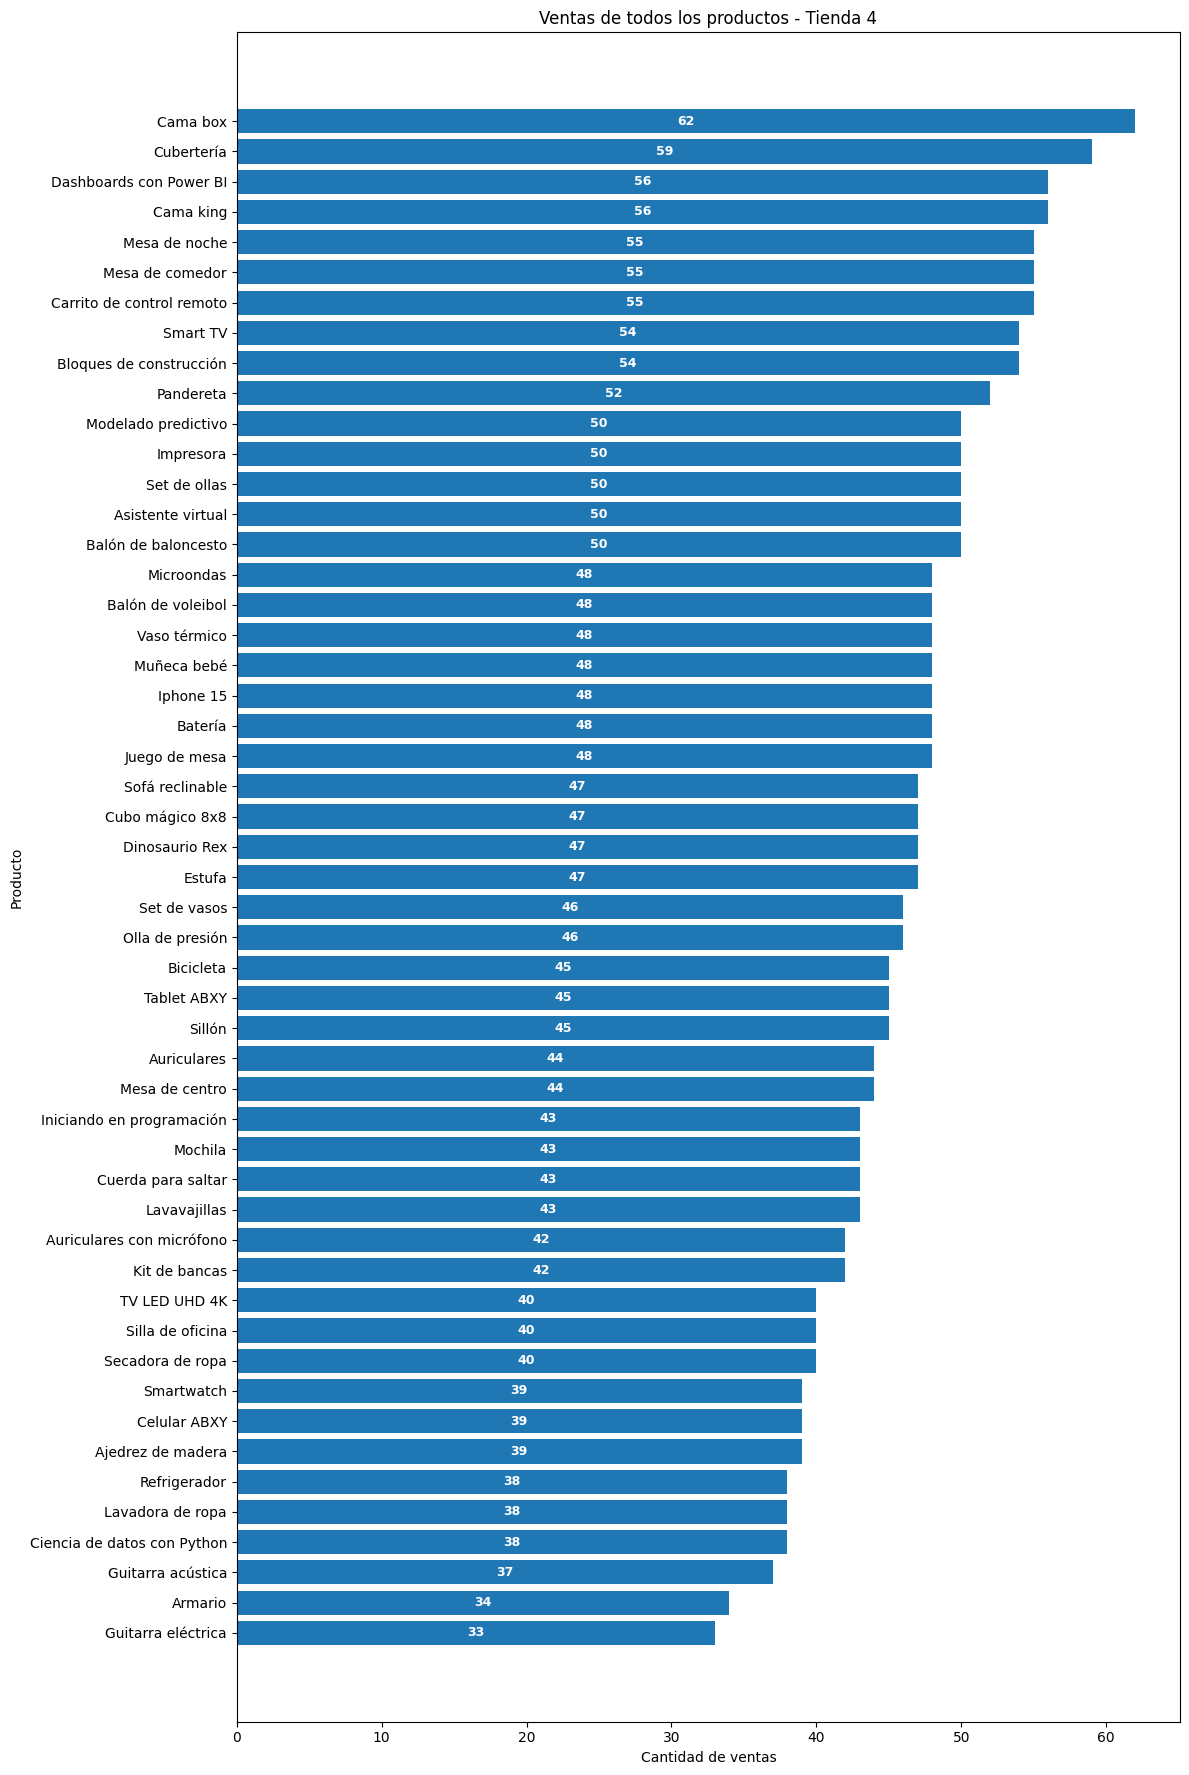

In [29]:
grafico_todos_productos(prod_tienda1, "Ventas de todos los productos - Tienda 1")
grafico_todos_productos(prod_tienda2, "Ventas de todos los productos - Tienda 2")
grafico_todos_productos(prod_tienda3, "Ventas de todos los productos - Tienda 3")
grafico_todos_productos(prod_tienda4, "Ventas de todos los productos - Tienda 4")


# 5. Envío promedio por tienda

In [19]:
tienda.rename(columns={'Costo de envío': 'envios'}, inplace=True)
tienda2.rename(columns={'Costo de envío': 'envios'}, inplace=True)
tienda3.rename(columns={'Costo de envío': 'envios'}, inplace=True)
tienda4.rename(columns={'Costo de envío': 'envios'}, inplace=True)

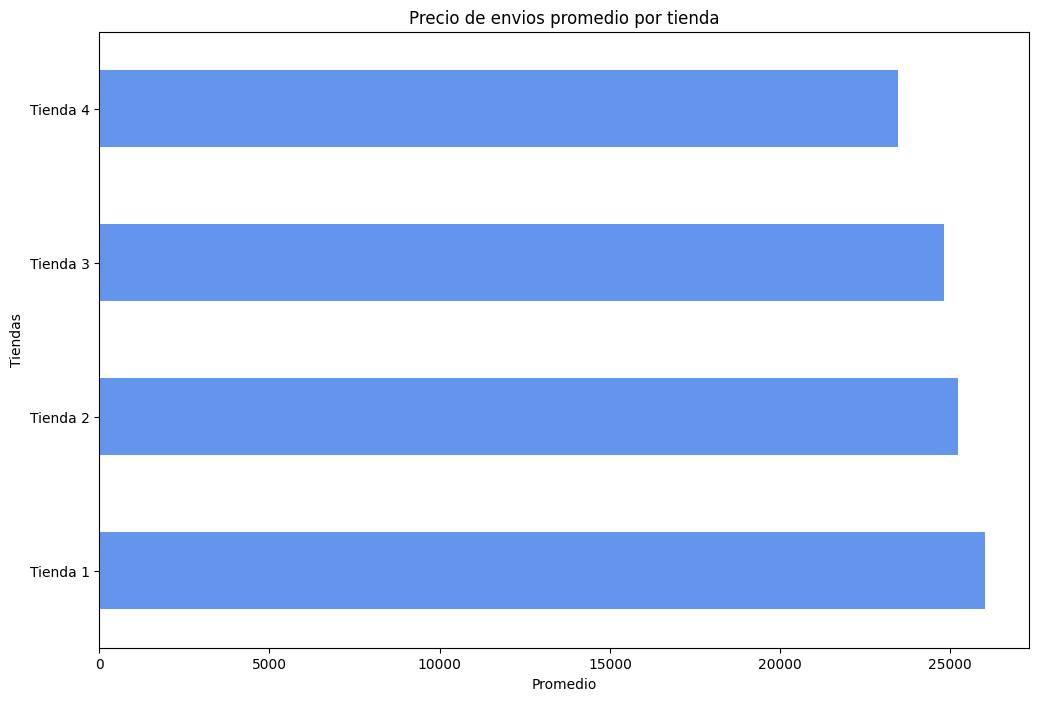

In [20]:
mean_envio1 = tienda.envios.mean()
mean_envio2 = tienda2.envios.mean()
mean_envio3 = tienda3.envios.mean()
mean_envio4 = tienda4.envios.mean()

mean_envios = pd.Series(
    [mean_envio1, mean_envio2, mean_envio3, mean_envio4],
    index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
)

mean_envios.plot(kind="barh", figsize=(12,8), color="cornflowerblue")
plt.title("Precio de envios promedio por tienda")
plt.xlabel("Promedio")
plt.ylabel("Tiendas")

plt.show()

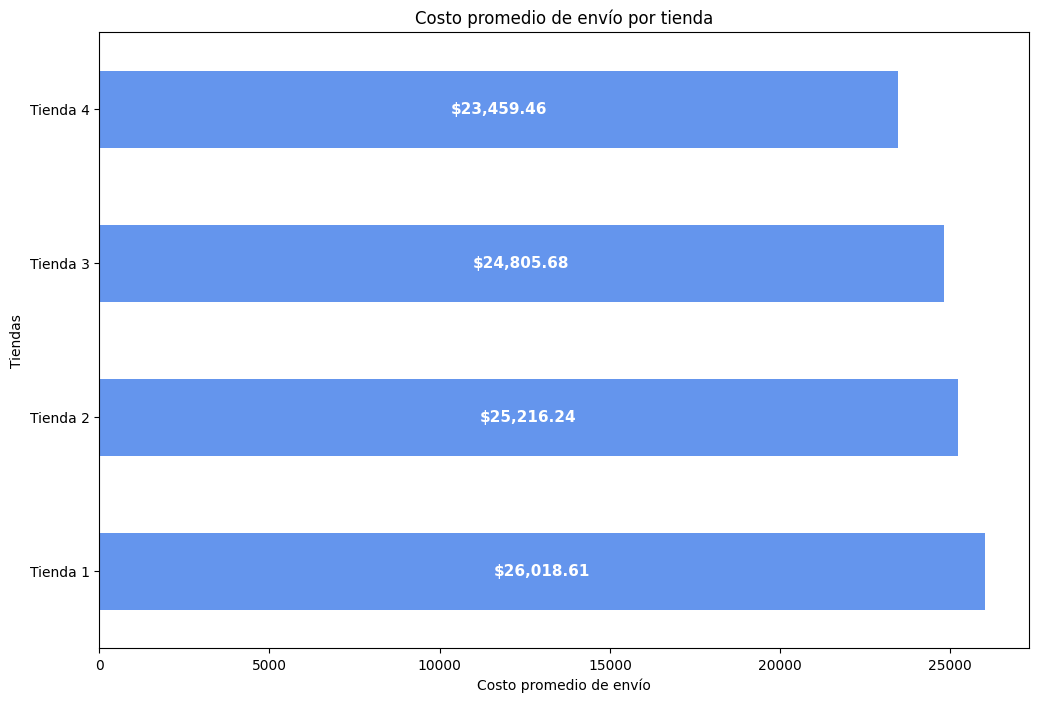

In [24]:
mean_envio1 = tienda["envios"].mean()
mean_envio2 = tienda2["envios"].mean()
mean_envio3 = tienda3["envios"].mean()
mean_envio4 = tienda4["envios"].mean()

envio_tiendas = pd.Series(
    [mean_envio1, mean_envio2, mean_envio3, mean_envio4],
    index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
)

ax = envio_tiendas.plot(kind="barh", figsize=(12,8), color="cornflowerblue")

plt.title("Costo promedio de envío por tienda")
plt.xlabel("Costo promedio de envío")
plt.ylabel("Tiendas")

for i, v in enumerate(envio_tiendas.values):
    ax.text(
        v * 0.5,
        i,
        f"${v:,.2f}",
        va='center',
        ha='center',
        color='white',
        fontweight='bold',
        fontsize=11
    )

plt.show()


### Como convertir latitud y longitud a direccion (geolocalizacion)

In [13]:
tienda.columns

Index(['Producto', 'categorias', 'Precio', 'Costo de envío', 'Fecha de Compra',
       'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago',
       'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [17]:
from folium import Map
from folium.plugins import HeatMap

mapa = Map(
    location=[tienda['lat'].mean(), tienda['lon'].mean()],
    zoom_start=10
)

heat_data = [
    [row['lat'], row['lon'], row['Precio']]
    for _, row in tienda.iterrows()
]

HeatMap(heat_data).add_to(mapa)

mapa


In [18]:
mapa2 = Map(
    location=[tienda2['lat'].mean(), tienda2['lon'].mean()],
    zoom_start=10
)

heat_data = [
    [row['lat'], row['lon'], row['Precio']]
    for _, row in tienda2.iterrows()
]

HeatMap(heat_data).add_to(mapa)

mapa

In [19]:
mapa3 = Map(
    location=[tienda3['lat'].mean(), tienda3['lon'].mean()],
    zoom_start=10
)

heat_data = [
    [row['lat'], row['lon'], row['Precio']]
    for _, row in tienda3.iterrows()
]

HeatMap(heat_data).add_to(mapa)

mapa

In [20]:
mapa = Map(
    location=[tienda4['lat'].mean(), tienda4['lon'].mean()],
    zoom_start=10
)

heat_data = [
    [row['lat'], row['lon'], row['Precio']]
    for _, row in tienda4.iterrows()
]

HeatMap(heat_data).add_to(mapa)

mapa